In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
import os
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD


In [23]:
categories1 = os.listdir('/content/gdrive/MyDrive/Program Hama Cabai/chili-plant-disease/Train')
categories2 = os.listdir('/content/gdrive/MyDrive/Program Hama Cabai/chili-plant-disease/Test')


In [24]:
categories1

['healthy', 'leaf curl', 'leaf spot', 'whitefly', 'yellowish']

In [25]:
categories2

['healthy', 'leaf spot', 'leaf curl', 'whitefly', 'yellowish']

In [26]:
training_set = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/Program Hama Cabai/chili-plant-disease/Train',
                                                image_size=(150, 150),
                                                batch_size=32,
                                                label_mode='categorical',)


Found 400 files belonging to 5 classes.


In [27]:
test_set = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/Program Hama Cabai/chili-plant-disease/Test',
                                            image_size=(150, 150),
                                            batch_size=32,
                                            label_mode='categorical')



Found 180 files belonging to 5 classes.


In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

#model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 batch_normalization_25 (Bat  (None, 148, 148, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 74, 74, 16)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 batch_normalization_26 (Bat  (None, 72, 72, 32)      

In [60]:
history = model.fit(x=training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
13/13 [==============================] - 2s 78ms/step - loss: 2.4208 - accuracy: 0.2850 - val_loss: 2.7283 - val_accuracy: 0.2111
Epoch 2/100
13/13 [==============================] - 1s 64ms/step - loss: 1.6584 - accuracy: 0.4475 - val_loss: 1.7300 - val_accuracy: 0.2111
Epoch 3/100
13/13 [==============================] - 1s 61ms/step - loss: 1.5644 - accuracy: 0.4400 - val_loss: 1.5105 - val_accuracy: 0.3500
Epoch 4/100
13/13 [==============================] - 2s 75ms/step - loss: 1.4558 - accuracy: 0.4900 - val_loss: 1.4475 - val_accuracy: 0.3222
Epoch 5/100
13/13 [==============================] - 1s 63ms/step - loss: 1.3369 - accuracy: 0.4950 - val_loss: 1.5171 - val_accuracy: 0.2833
Epoch 6/100
13/13 [==============================] - 1s 58ms/step - loss: 1.2471 - accuracy: 0.5050 - val_loss: 1.4734 - val_accuracy: 0.3667
Epoch 7/100
13/13 [==============================] - 1s 56ms/step - loss: 1.2392 - accuracy: 0.5500 - val_loss: 1.4198 - val_accuracy: 0.3500
Epoch 

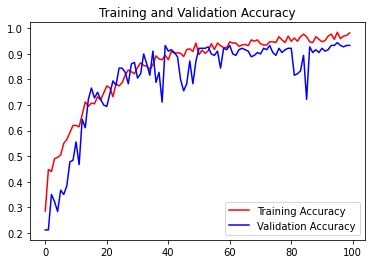

<Figure size 432x288 with 0 Axes>

In [61]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

<Figure size 432x288 with 0 Axes>

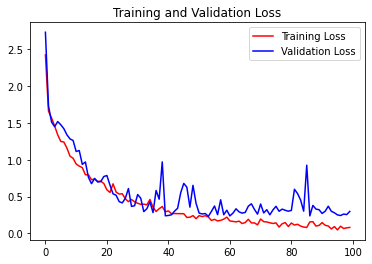

<Figure size 432x288 with 0 Axes>

In [62]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

In [63]:
val_samples = sum([y.shape[0] for [_, y] in test_set])
val_samples

180

In [64]:
def pred(model):
    y_val = []
    y_val_pred = []
    for images, targets in test_set:
        for image, target in zip(images, targets):
            img_array = image.numpy().astype("uint8")
            prediction = model.predict(np.array([img_array]))
            y_val_pred.append(np.argmax(prediction))
            y_val.append(np.argmax(target))
            
    return y_val, y_val_pred

In [65]:
import plotly.express as px
from sklearn.metrics import confusion_matrix, classification_report

y_val, y_val_pred=pred(model)

print('Confusion Matrix :')
print()
print(confusion_matrix(y_val, y_val_pred))
print()
print()
print('Classification Report :')
print()
print(classification_report(y_val, y_val_pred))

Confusion Matrix :

[[33  2  0  1  0]
 [ 0 36  0  0  0]
 [ 1  1 33  1  0]
 [ 0  1  0 35  0]
 [ 0  4  0  0 32]]


Classification Report :

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.82      1.00      0.90        36
           2       1.00      0.92      0.96        36
           3       0.95      0.97      0.96        36
           4       1.00      0.89      0.94        36

    accuracy                           0.94       180
   macro avg       0.95      0.94      0.94       180
weighted avg       0.95      0.94      0.94       180



In [ ]:
def print_cf(model):
    y_val, y_val_pred=pred(model)
    cm = confusion_matrix(y_val, y_val_pred,normalize='true')
    fig = px.imshow(cm, labels=dict(x="Predicted", y="Real"), x=categories1,y=categories2)
    fig.update_xaxes(side="top")
    fig.show()

In [ ]:
print_cf(model)

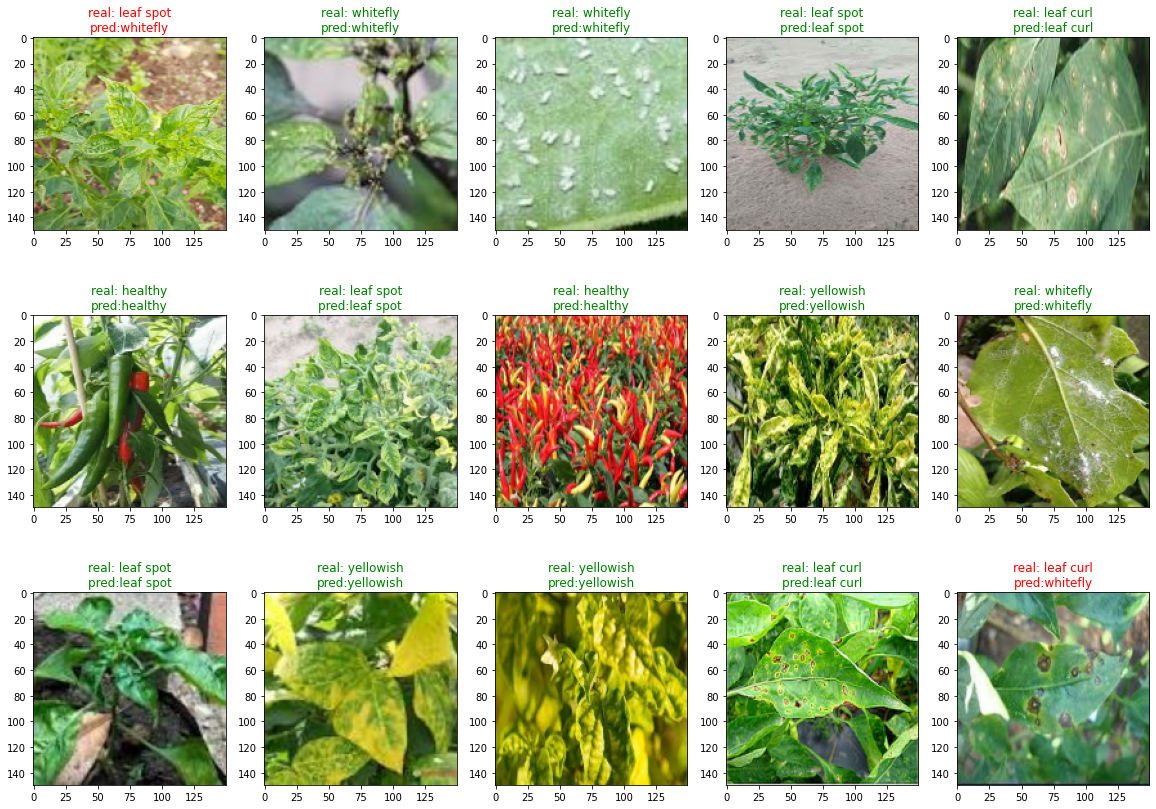

In [50]:
plt.figure(figsize=(20, 40))
for images, labels in test_set.take(1):
    for i in range(15):
        ax = plt.subplot(8, 5, i + 1)
        
        img_array = images[i].numpy().astype("uint8")
        prediction = model.predict(np.array([img_array]))
        prediction_name = categories2[np.argmax(prediction)]
        real_name = categories2[np.argmax(labels[i])]
        
        plt.imshow(img_array)
        if prediction_name == real_name:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'g'})
        else:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'r'})

In [51]:
model.save('/content/drive/MyDrive/Program Hama Cabai/Model_CNN.h5')